https://docs.google.com/document/d/1PyKkmGoXx5crN4LzGh1bHr1jqw2IUIahw_mr_hucQ8s/edit?pli=1#heading=h.di44lio68dhw

Notes:

Session worked well with E=7.7 keV. Very close to edge so expect slightly mixed scattering process.

Simulations are for AF moment direction so need to add or substract 90 dgrees (this is not currently done in the simulations).

Total magnetic scattering intensity always seems to have more sp than ss; not expected from simulations. Agrees if some E1E1 added in or huge negative orbital component. This means that the total magnetic intensity is inverted compared to simulations and has smaller contrast (looks more like the simulation in the absence of the 90 degree rotation).

There is some intensity above TN (as seen before). At 7.7 keV this is in s-p channel and maybe tails of E2E2 resonance. There is also an even smaller component from harmonics. Probably not worth adding harmonic rejection mirrors.

Next time: Look for non-resonant scattering at much lower enegy: still mainly s-p??
Had planned: 
#pos uharmonic 3
#pos energy 4.37
#pos psic 0
but beam lost so didn't get chance.

Look also at high-temp weak 009 (can be done at 300K). 

problems:
addmeta(magrot) - added magrot to .dat files but not to nexus files. check that all .dat file metadata are in nexus files.

In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
cifpath='/home/spc93/spc_cifs/'

from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

#from dlstools.quickfit import *
import matplotlib.pyplot as plt

import TensorScatteringClass as ten

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

#p='/dls/i16/data/2022/cm31138-6/%i.nxs'
p='/dls/i16/data/2023/si33845-1/%i.nxs'

=== Importing dlstools package


UB matrix for 006, 104 refined at low temp

low temp lattice c = 14.889

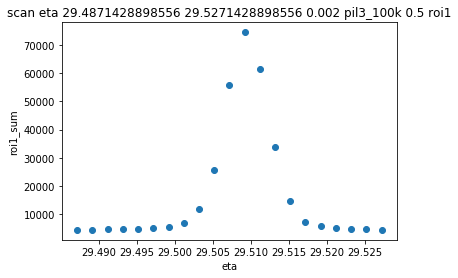

In [2]:
#009 mag ref 6.5K
n = pdnx(p % 1013477)
n.nx.plot()

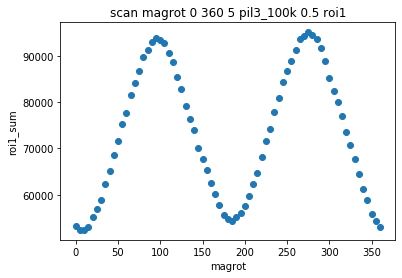

In [3]:
#009 mag ref 6.5K
n = pdnx(p % 1013478)
n.nx.plot()

<IPython.core.display.Javascript object>


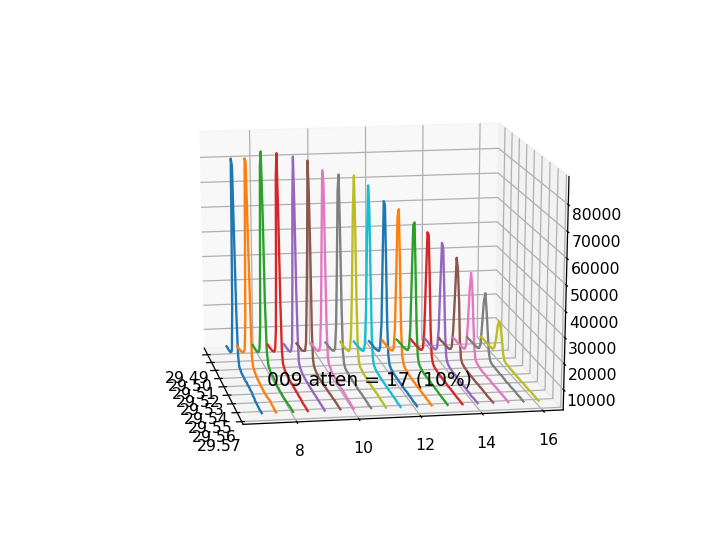

In [5]:
from mpl_toolkits import mplot3d
%matplotlib notebook

ax = figure().gca(projection='3d')
for i in range(1013479, 1013497+1):
    n = pdnx(p % i)
    #n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
    ax.plot(n.eta, n.Ta, n.roi1_sum); title('009 atten = 17 (10%)')





Crystal properties

                    CIF file:  /home/spc93/spc_cifs/CoCO3_icsd_61066.cif
                     Lattice:  4.662 4.662 14.963 90.00 90.00 120.00
                   All sites:  Co1, C1, O1
               Site selected:  Co1
                 Site vector:  0.000 0.000 0.000
       No. of spacegroup ops:  36
      No. of sym ops at site:  6
 No. of equiv. sites in cell:  6
   No. of pg ops for crystal:  12


<IPython.core.display.Javascript object>


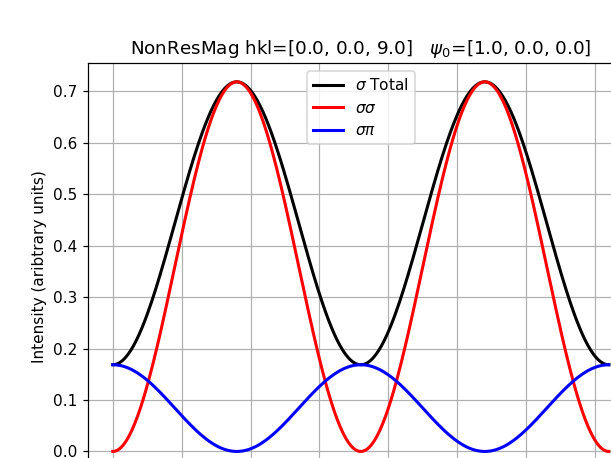

<IPython.core.display.Javascript object>


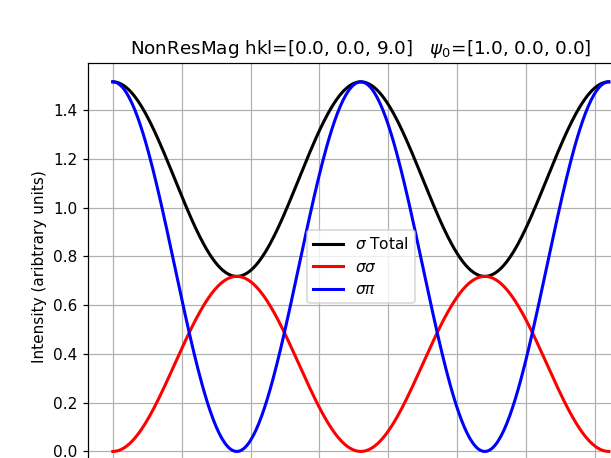

<IPython.core.display.Javascript object>


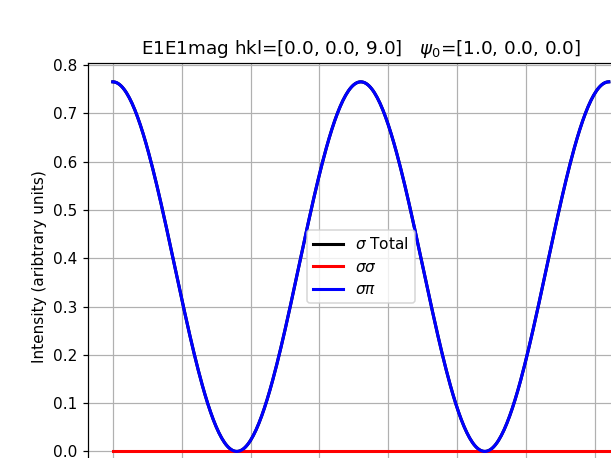

In [154]:
ciffile=cifpath+'CoCO3_icsd_61066.cif'
# simulate for 009 7.7 keV
t=ten.TensorScatteringClassMagrotExtension(CIFfile=ciffile, Site='Co1');
#spin scattering
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/7.7, hkl=np.array([0,0,9]), hkln=np.array([1,0,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([1,0,0]), sigmapi='sigma')
#non-res with huge negative orbital component
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/7.7, hkl=np.array([0,0,9]), hkln=np.array([1,0,0]), psideg=0, lk=np.array([-2,0,0]), sk=np.array([1,0,0]), sigmapi='sigma')
#E1E1 scattering
t.PlotIntensityInPolarizationChannelsVsMagrot('E1E1mag', lam=12.4/7.7, hkl=np.array([0,0,9]), hkln=np.array([1,0,0]), psideg=0, lk=np.array([0,0,0]), mk=np.array([1,0,0]), sigmapi='sigma')


<IPython.core.display.Javascript object>


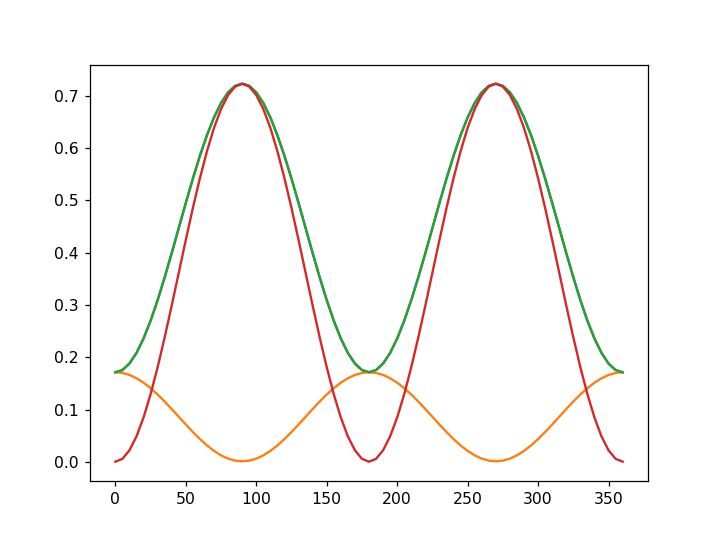

In [14]:
#009 mag ref simulation
figure()

n = pdnx(p % 1013501)
plot(n.magnet, n.Itot_magSpin)
plot(n.magnet, n.Ipol_magSpin)
n = pdnx(p % 1013502)
plot(n.magnet, n.Itot_magSpin)
plot(n.magnet, n.Ipol_magSpin)

<IPython.core.display.Javascript object>


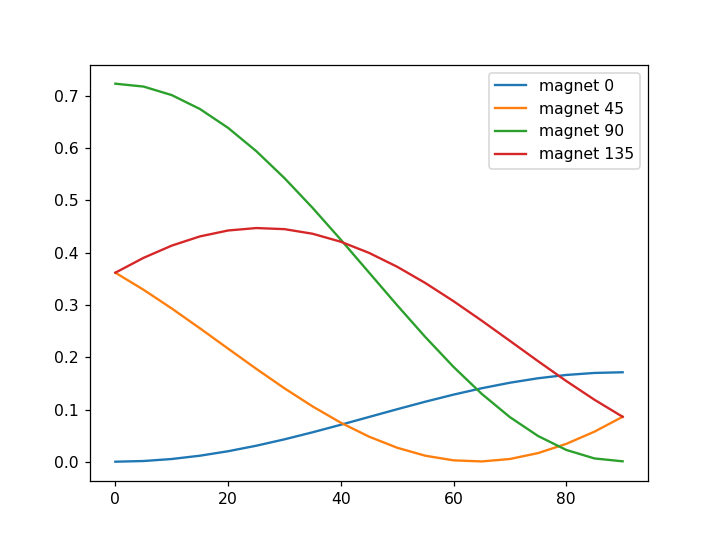

In [30]:
#009 mag ref simulation
figure()

n = pdnx(p % 1013503)
plot(n.rotp, n.Ipol_magSpin, label = 'magnet 0')
n = pdnx(p % 1013504)
plot(n.rotp, n.Ipol_magSpin, label = 'magnet 45')
n = pdnx(p % 1013505)
plot(n.rotp, n.Ipol_magSpin, label = 'magnet 90')
n = pdnx(p % 1013506)
plot(n.rotp, n.Ipol_magSpin, label = 'magnet 135')
legend()

<IPython.core.display.Javascript object>


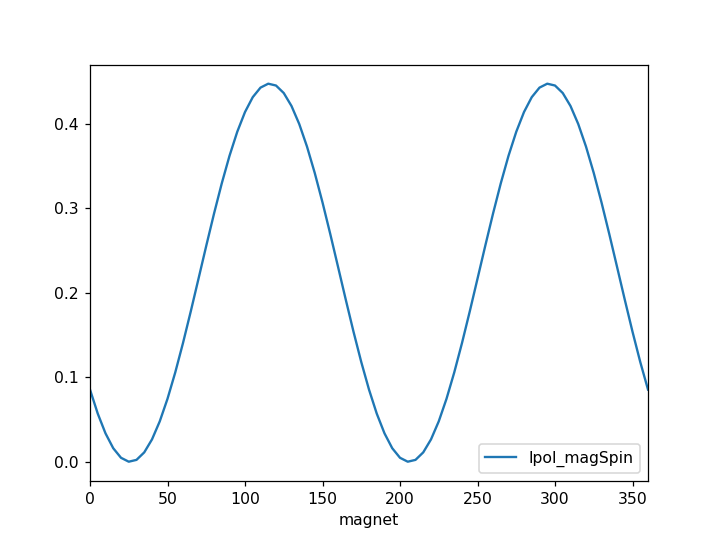

In [28]:
n = pdnx(p % 1013507)
n.plot('magnet', 'Ipol_magSpin')

In [43]:
for scan in range(1013477, 1013507):
    n = pdnx(p % scan)
    print(scan, n.nx.entry1.scan_command)

1013477 scan eta 29.4871428898556 29.5271428898556 0.002 pil3_100k 0.5 roi1
1013478 scan magrot 0 360 5 pil3_100k 0.5 roi1
1013479 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013480 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013481 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013482 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013483 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013484 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013485 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013486 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013487 scan eta 29.487142889855598 29.567142889855596 0.002 tset Ta Tb pil3_100k 0.5 roi1
1013488 scan eta 29.487142889855598 29.567142889855596 0.0

<IPython.core.display.Javascript object>


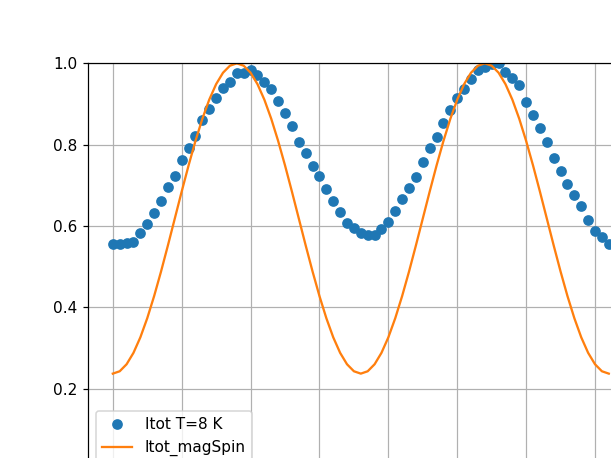

<IPython.core.display.Javascript object>


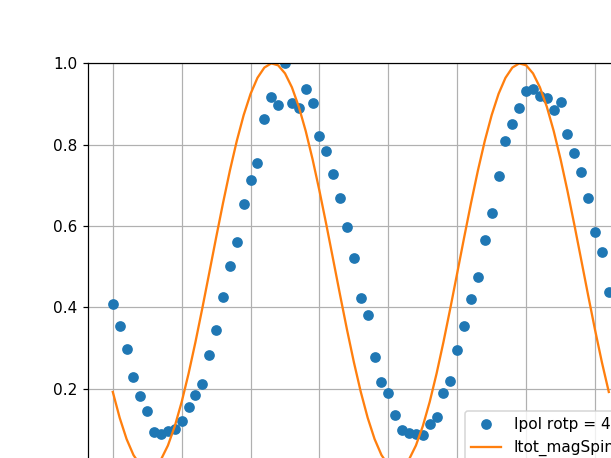

<IPython.core.display.Javascript object>


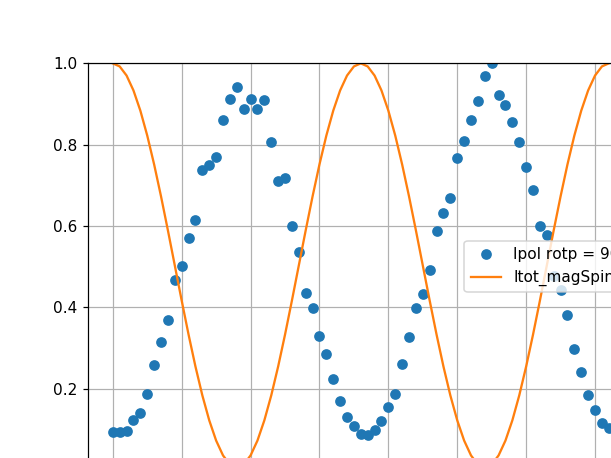

<IPython.core.display.Javascript object>


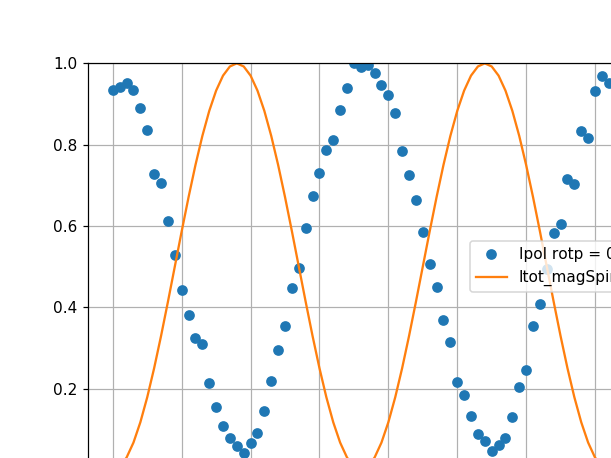

In [129]:
figure()
n = pdnx(p % 1013511)
plot(n.magnet, n.roi1_sum/max(n.roi1_sum), 'o', label = 'Itot T=8 K')
plot(n.magnet, n.Itot_magSpin/max(n.Itot_magSpin), label = 'Itot_magSpin')
legend(); ylim([0, 1]);grid()

figure()
n = pdnx(p % 1013512)
plot(n.magnet, n.merlinroi2_sum/max(n.merlinroi2_sum), 'o', label = 'Ipol rotp = 45')
plot(n.magnet, n.Ipol_magSpin/max(n.Ipol_magSpin), label = 'Itot_magSpin')
legend(); ylim([0, 1]);grid()

figure()
n = pdnx(p % 1013513)
plot(n.magnet, n.merlinroi2_sum/max(n.merlinroi2_sum), 'o', label = 'Ipol rotp = 90')
plot(n.magnet, n.Ipol_magSpin/max(n.Ipol_magSpin), label = 'Itot_magSpin')
legend(); ylim([0, 1]);grid()

figure()
n = pdnx(p % 1013514)
plot(n.magnet, n.merlinroi2_sum/max(n.merlinroi2_sum), 'o', label = 'Ipol rotp = 0')
plot(n.magnet, n.Ipol_magSpin/max(n.Ipol_magSpin), label = 'Itot_magSpin')
legend(); ylim([0, 1]);grid()

#merlinroi2_sum
#Ipol_magSpin


<IPython.core.display.Javascript object>


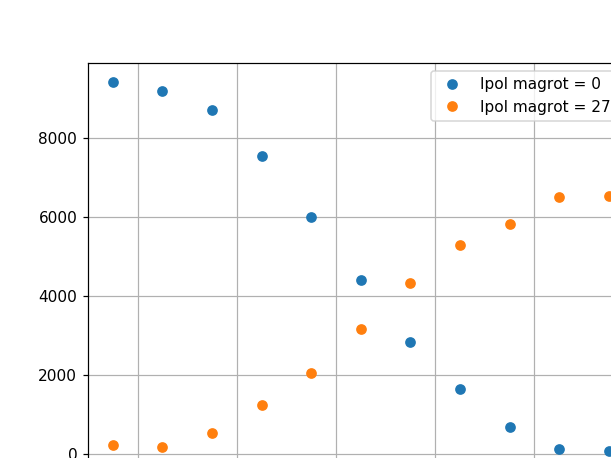

In [145]:
figure()
n = pdnx(p % 1014071)
plot(n.rotp, n.merlinroi2_sum, 'o', label = 'Ipol magrot = 0')
n = pdnx(p % 1014073)
plot(n.rotp, n.merlinroi2_sum, 'o', label = 'Ipol magrot = 271')
legend(); grid()

In [138]:
n = pdnx(p % 1013503)
n.find('magrot')


simulations not quite right. gets toat scattering right but pol 0 and pol 90 reversed...

suspect rotation and contribution from E1E1

<IPython.core.display.Javascript object>


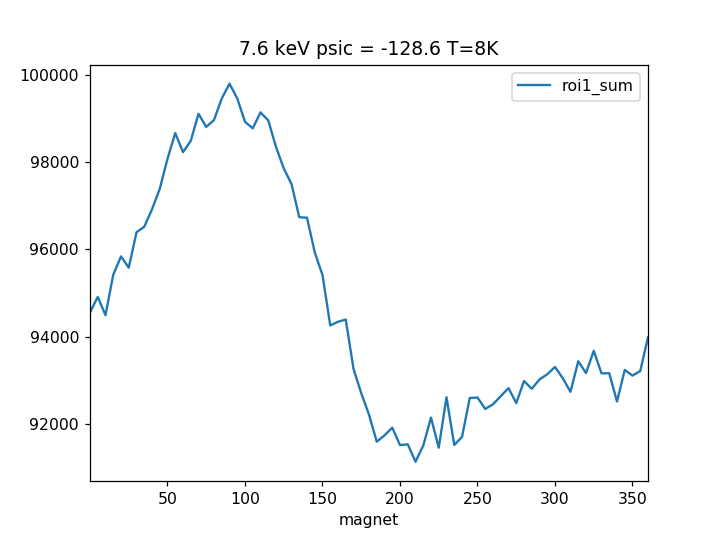

<IPython.core.display.Javascript object>


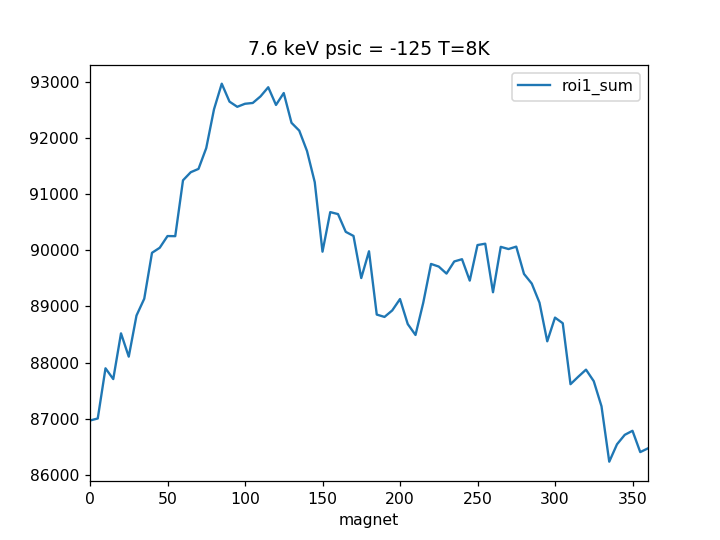

<IPython.core.display.Javascript object>


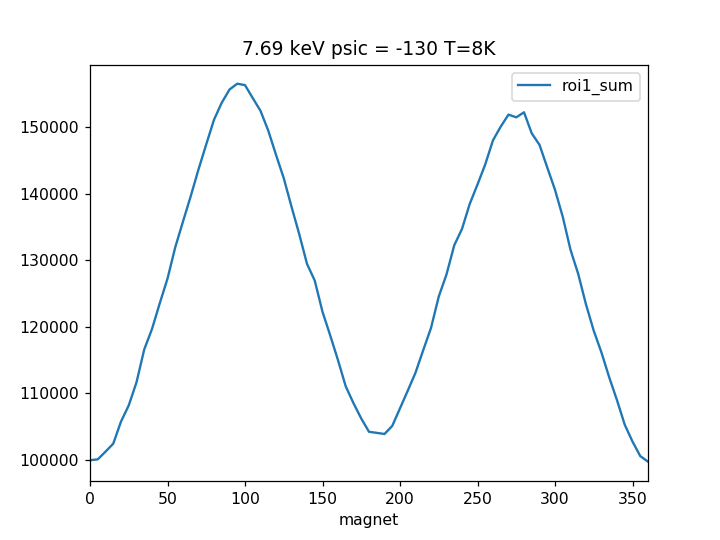

<IPython.core.display.Javascript object>


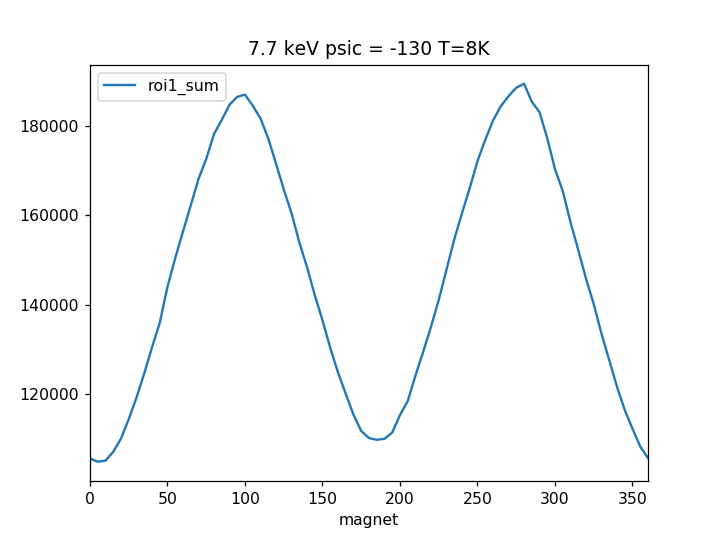

<IPython.core.display.Javascript object>


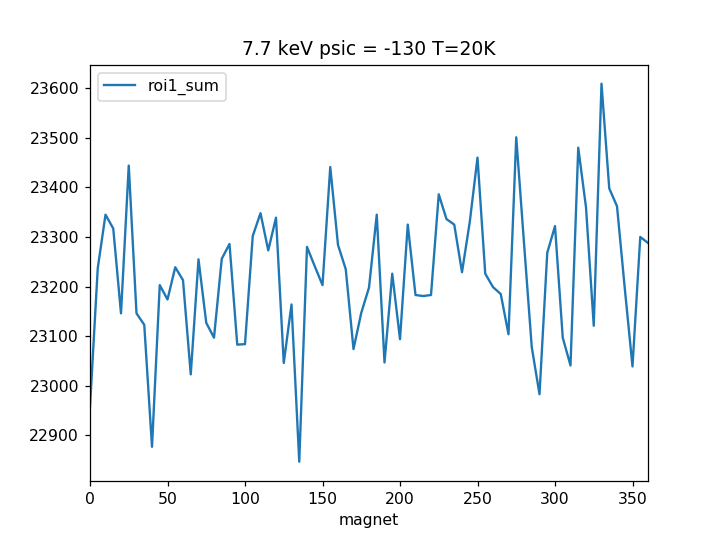

<IPython.core.display.Javascript object>


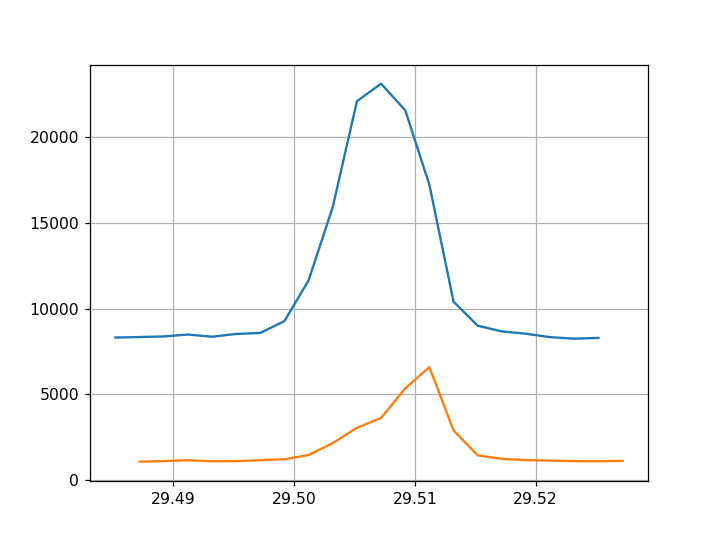

<IPython.core.display.Javascript object>


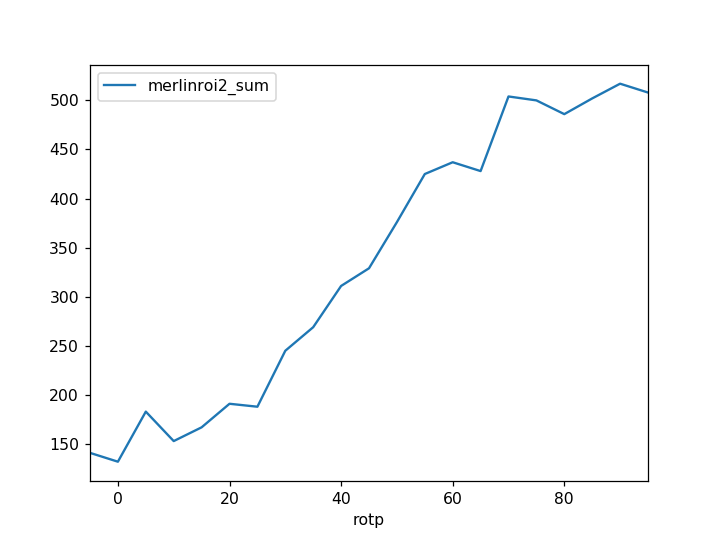

In [78]:
n = pdnx(p % 1013557)
n.plot('magnet', 'roi1_sum')
title('7.6 keV psic = -128.6 T=8K')

n = pdnx(p % 1013563)
n.plot('magnet', 'roi1_sum')
title('7.6 keV psic = -125 T=8K')

n = pdnx(p % 1013567)
n.plot('magnet', 'roi1_sum')
title('7.69 keV psic = -130 T=8K')

n = pdnx(p % 1013571)
n.plot('magnet', 'roi1_sum')
title('7.7 keV psic = -130 T=8K')

n = pdnx(p % 1013573)
n.plot('magnet', 'roi1_sum')
title('7.7 keV psic = -130 T=20K')

figure()
n = pdnx(p % 1013572)
plot(n.eta, n.roi1_sum, label = 'T=20 K atten 17 10%')
n = pdnx(p % 1013574)
plot(n.eta, n.roi1_sum, label = 'T=20 K atten 33 1%')
grid()
#### small harmoic contribution at higher angles

n = pdnx(p % 1013578)
n.plot('rotp', 'merlinroi2_sum')
#title('7.7 keV T=20K all in s-p: tail of E2E2 resonance?')


<IPython.core.display.Javascript object>


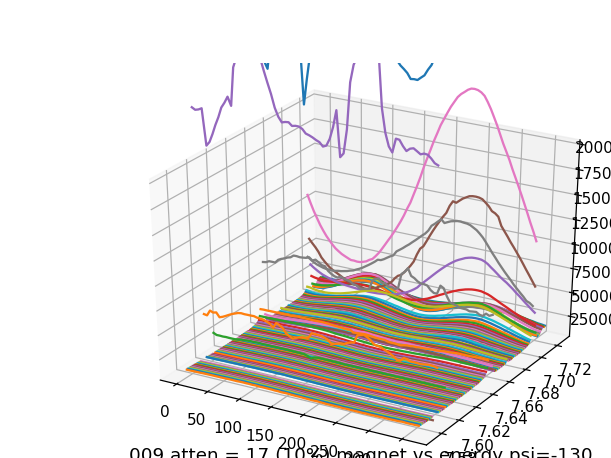

<IPython.core.display.Javascript object>


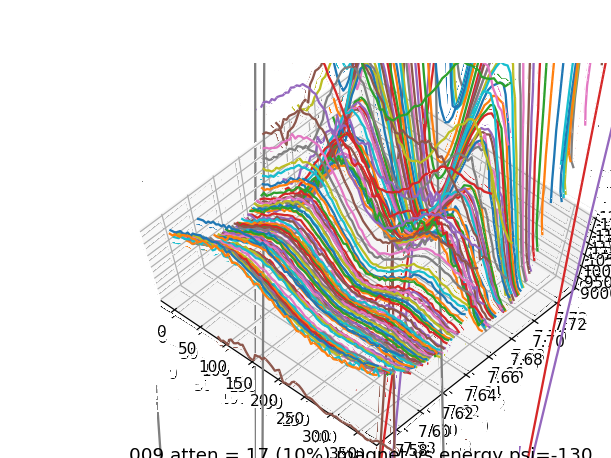

(90000, 120000)

In [148]:
from mpl_toolkits import mplot3d
%matplotlib notebook

ax = figure().gca(projection='3d')
for i in range(1013588, 1014043+1, 3):
    n = pdnx(p % i)
    #n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
    ax.plot(n.magnet, n.en, n.roi1_sum); title('009 atten = 17 (10%) magnet vs energy psi=-130')
ax.set_zlim(80000, 2000000)


ax = figure().gca(projection='3d')
for i in range(1013588, 1014043+1, 3):
    n = pdnx(p % i)
    #n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
    ax.plot(n.magnet, n.en, n.roi1_sum); title('009 atten = 17 (10%) magnet vs energy psi=-130')
ax.set_zlim(90000, 120000)



<IPython.core.display.Javascript object>


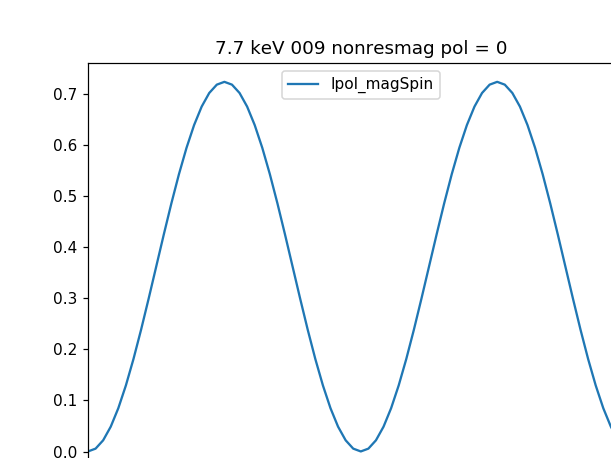

<IPython.core.display.Javascript object>


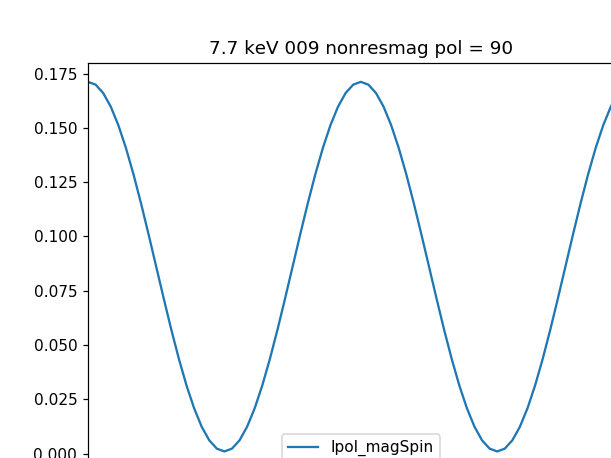

<IPython.core.display.Javascript object>


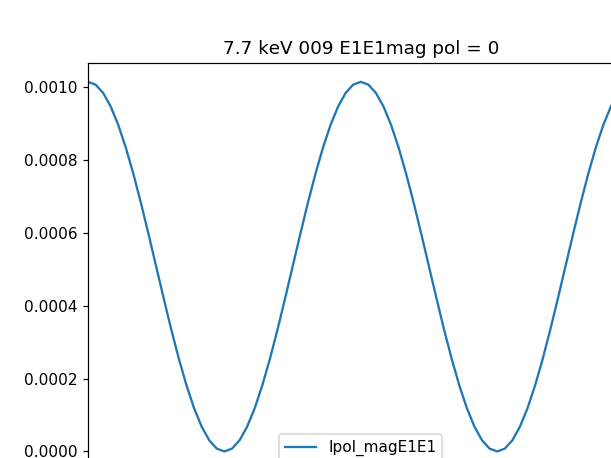

<IPython.core.display.Javascript object>


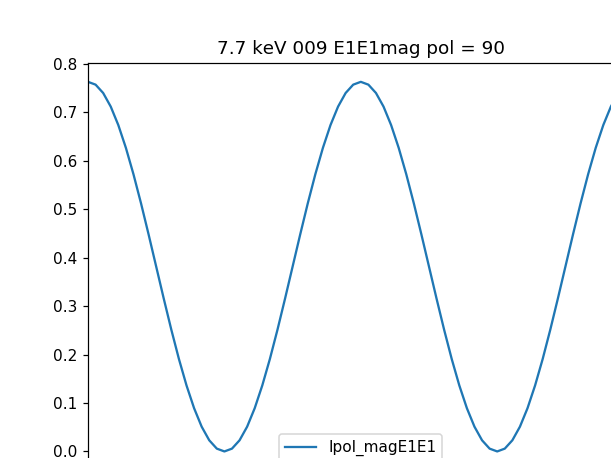

Text(0.5, 1.0, '7.7 keV 009 E1E1mag pol = 90')

In [146]:
#simpol simulations on beamline
n = pdnx(p % 1014077)
n.plot('magnet', 'Ipol_magSpin')
title('7.7 keV 009 nonresmag pol = 0')

n = pdnx(p % 1014078)
n.plot('magnet', 'Ipol_magSpin')
title('7.7 keV 009 nonresmag pol = 90')

n = pdnx(p % 1014079)
n.plot('magnet', 'Ipol_magE1E1')
title('7.7 keV 009 E1E1mag pol = 0')

n = pdnx(p % 1014080)
n.plot('magnet', 'Ipol_magE1E1')
title('7.7 keV 009 E1E1mag pol = 90')


# Next school: look for non-resonant scattering 4.37 keV psi = 0 (good for multiple scattering). Beam keeps being lost so can't do it now...